# 2030ICT/7030ICT

## Introduction to Big Data Analytics

Assignment Specifications Part 1

Group Submission - Louise Howard, Caleb Davis, Mark English

## Part 1 Section 1 - Describe the Dataset

In [1]:

# import all libraries requird in the code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

# read in the data from the supplied assignment file and check input via table 
df = pd.read_csv("data_assignment.csv")


In [2]:
# Describe the dataset (e.g.: type of column, value range)
# How many rows (first # outputted) and columns are in the dataset
print(f'Describe the dataset:')
print(f'Shape {df.shape},')
print(f'Column Headers {df.columns}')


Describe the dataset:
Shape (149999, 13),
Column Headers Index(['Id', 'Title', 'Company', 'Date', 'Location', 'Area', 'Classification',
       'SubClassification', 'Requirement', 'FullDescription', 'LowestSalary',
       'HighestSalary', 'JobType'],
      dtype='object')


In [3]:
# How many records are there in the dataset?
print(f'There are {df.shape[0]}, records in the dataset.')

There are 149999, records in the dataset.


In [4]:
# What period does it cover?
# Assign the lowest date to firstDate and the highest date to lastDate then print out the period covered
firstDate = df["Date"].min()
lastDate = df["Date"].max()

print(f'The period covered is from the {firstDate}, to the {lastDate}.')

# How many dates have job postings?
# Assign the number of dates in the range to jb and then look at the length of the list, then print out
jb = df["Date"].value_counts()
posted = len(jb)

print(f'There are {posted} dates that have job postings.')

The period covered is from the 2018-10-01T00:00:00.000Z, to the 2018-11-13T00:00:00.000Z.
There are 44 dates that have job postings.


In [5]:
# How many locations does the dataset have?
locations = df['Location'].value_counts()
locationscount = len(locations)
print(locationscount)
# Which location has the most job postings?
print(f'{locations.keys()[0]} has the most jobs with {locations[0]} postings')


65
Sydney has the most jobs with 46357 postings


In [6]:
# How many job sectors (job classifications) are there in the dataset?
classes = df['Classification'].value_counts()
class_counts = len(classes)
print(f'There are {class_counts} job sectors (names and amounts listed below)')
# List the name of each sector and it's total of job postings? 
sector_counts = df['Classification'].value_counts()
sector_counts

There are 30 job sectors (names and amounts listed below)


Information & Communication Technology    16661
Trades & Services                         14125
Healthcare & Medical                      12515
Hospitality & Tourism                     11818
Manufacturing, Transport & Logistics       9608
Administration & Office Support            7636
Accounting                                 7075
Education & Training                       7033
Retail & Consumer Products                 6496
Sales                                      6281
Construction                               6254
Government & Defence                       5926
Engineering                                4812
Mining, Resources & Energy                 4679
Community Services & Development           3528
Banking & Financial Services               3481
Human Resources & Recruitment              3233
Call Centre & Customer Service             3127
Legal                                      3071
Marketing & Communications                 3052
Real Estate & Property                  

In [7]:
#Choose your favorite job sector (e.g. Information & Communication Technology), how many sub-sectors are there in that sector? List the name of each sub-sector and its’ job posting number

# Copy the subclasses of selected Class to another array
selectedClass = 'Information & Communication Technology'
subclasses = []
for i in range(len(df['Classification'])):
    if df['Classification'][i] == selectedClass:
        subclasses.append(df['SubClassification'][i])
# Use a dict to count dupes
subs2 = {}
for i in range(len(subclasses)):
    if subclasses[i] not in subs2:
        subs2[subclasses[i]] = 1
    else:
        count = subs2[subclasses[i]]
        subs2[subclasses[i]] = count + 1
print(f'There are {len(subs2)} sub-sectors (names and amounts listed below)')
subs2

There are 22 sub-sectors (names and amounts listed below)


{'Help Desk & IT Support': 1074,
 'Sales - Pre & Post': 349,
 'Networks & Systems Administration': 927,
 'Programme & Project Management': 1665,
 'Security': 524,
 'Consultants': 849,
 'Architects': 1110,
 'Other': 742,
 'Business/Systems Analysts': 2076,
 'Developers/Programmers': 3069,
 'Web Development & Production': 351,
 'Engineering - Software': 1087,
 'Product Management & Development': 281,
 'Engineering - Network': 402,
 'Team Leaders': 141,
 'Testing & Quality Assurance': 606,
 'Management': 561,
 'Database Development & Administration': 395,
 'Telecommunications': 269,
 'Technical Writing': 77,
 'Engineering - Hardware': 94,
 'Computer Operators': 12}

In [8]:
high = df['HighestSalary']
low = df['LowestSalary']
ranges = {}
for i in range(len(high)):
    if (low[i], high[i]) not in ranges:
        ranges[(low[i], high[i])] = 1
    else:
        rangecount = ranges[(low[i], high[i])]
        ranges[(low[i], high[i])] = rangecount + 1
ranges

{(0, 30): 27606,
 (30, 40): 12441,
 (40, 50): 17708,
 (50, 60): 12559,
 (60, 70): 14108,
 (70, 80): 12932,
 (80, 100): 12582,
 (100, 120): 13062,
 (120, 150): 10651,
 (150, 200): 11738,
 (200, 250): 4612}

In [9]:
#List the job types. In each job type, what are the lowest salary and highest salary?
#using high and low form last
jobtypes = df['JobType'].value_counts()
#listjobtypes = jobtypes.keys()
print(listjobtypes)
highest = [''] * len(listjobtypes)
lowest = [''] * len(listjobtypes)
for i in range(len(df['JobType'])):
    for j in range(len(listjobtypes)):
        if df['JobType'][i] == listjobtypes[j]:
            if highest[j] == '':
                highest[j] = high[i]
            if highest[j] < high[i]:
                highest[j] = high[i]
            if lowest[j] == '':
                lowest[j] = low[i]
            if lowest[j] > low[i]:
                lowest[j] = low[i]
print(f'the job types are')
for k in range(len(listjobtypes)): 
    print(f'{listjobtypes[k]} with salaries ranging from {lowest[k]} to {highest[k]}')

Index(['Full Time', 'Contract/Temp', 'Casual/Vacation', 'Part Time'], dtype='object')
the job types are
Full Time with salaries ranging from 0 to 250
Contract/Temp with salaries ranging from 0 to 250
Casual/Vacation with salaries ranging from 0 to 250
Part Time with salaries ranging from 0 to 250


In [14]:
## Part 1 Section 2 - Normalize and clean data

In [10]:
# The salaries are kept in the dataset as “HighestSalary” and “LowestSalary”. 
# You should calculate the “AverageSalary” for each job.

# Calculate the average salary for each job and place in new column by - (lowest salary + highest salary) / 2
df["AverageSalary"] = (df["LowestSalary"] + df["HighestSalary"]) / 2


# Check for first 8 rows and look for extra column called AverageSalary
df.head(8)


,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,15.0
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN,15.0
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,15.0
5,37404307,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Customer Service - Call Centre,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,15.0
6,37404355,Casual Café All-rounder in Semaphore,Jora Local,2018-10-07T00:00:00.000Z,Adelaide,NaN,Hospitality & Tourism,Waiting Staff,A cafe/restaurant in Semaphore is seeking a ca...,NaN,0,30,NaN,15.0
7,37404350,Casual Café All-rounder in Woolloongabba,Jora Local,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Hospitality & Tourism,Waiting Staff,A cafe in Woolloongabba is seeking a casual Ca...,NaN,0,30,NaN,15.0


In [11]:
# The raw dataset values of the "Id" column had inconsistencies in their representation. 
# The Id values should have 8 number long integers only. Write code to remove unnecessary characters.
# What values are not 8 long ints that need to be fixed?

In [12]:
# The "Date" column is represented in a format that contained both date and time information. 
# However, the time is not correct and should be removed 

df["Date"] = df["Date"].replace(to_replace = r'T.*', value = '', regex = True)


In [13]:
# Change type of “Id” column to numeric and change type of “Date” column to DateTime
# 'Id' is already INT
df["Date"] = pd.to_datetime(df["Date"])
df.dtypes

Id                            int64
Title                        object
Company                      object
Date                 datetime64[ns]
Location                     object
Area                         object
Classification               object
SubClassification            object
Requirement                  object
FullDescription              object
LowestSalary                  int64
HighestSalary                 int64
JobType                      object
AverageSalary               float64
dtype: object

In [16]:
# Are there any duplicate data in the dataset? Provide the way you find them and your solution to fix it.
Ids = {}
Dupes = []
for i in range(len(df['Id'])):
    if df['Id'][i] not in Ids:
        Ids[df['Id'][i]] = 1
    else:
        Dupes.append(df['Id'][i])
if len(Dupes) > 0:
    if len(Dupes) == 1:
        print(f"there is 1 Duplicate Having an Id of {Dupes}")
    else:
        print(f"there is {len(Dupes)} Duplicates Having Id's of {Dupes}")
else:
    print("There are no duplicates")

There are no duplicates


In [ ]:
# Check missing data and visualize them in a corresponding chart.** (1.5 point)



## Part 2 – Data Analysis and Interpretation

In [246]:
# Get the salary ranges using “AverageSalary”, the total jobs of each range and display them in the bar chart




In [247]:
# Display the list of job types and the number of jobs of each type using pie chart

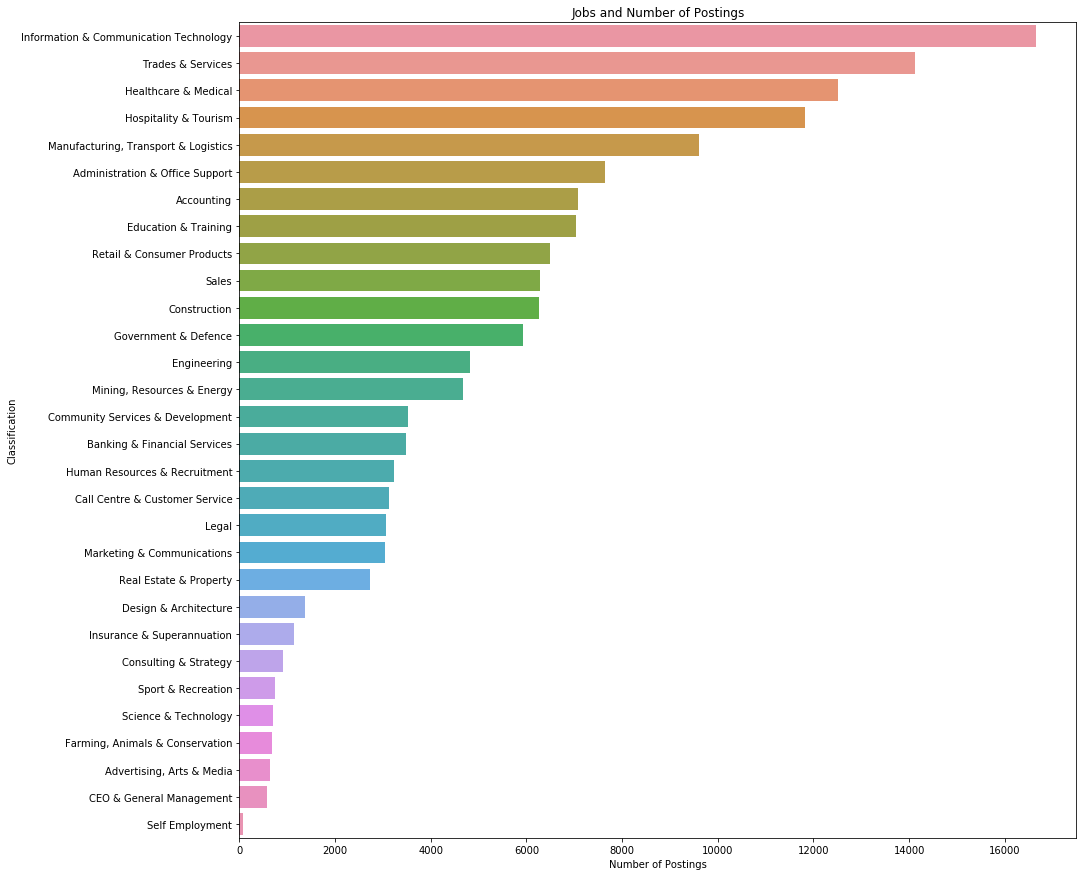

In [3]:
# Display the list of job sectors and the number of jobs of each type using horizontal bar chart

plt.figure(figsize=(15,15))
sns.countplot(y='Classification',data=df,order=df.Classification.value_counts().index)
plt.title('Jobs and Number of Postings')
plt.xlabel('Number of Postings')
plt.show()

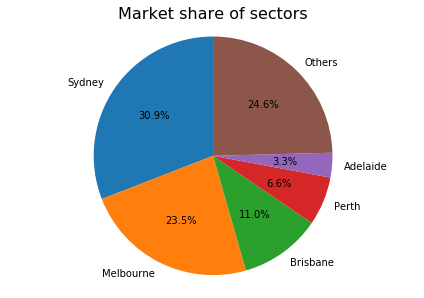

In [4]:
# These need to be worked on to fix for the assignment submission. 


# Choose your favorite location. Visualize the market share of that location in pie chart

locationDf = df[df['Location'].isna()==False]
locationDf = locationDf.groupby('Location').count()
locationDf['Location'] = locationDf.index
locationDf['Count'] = locationDf["Id"]
locationDf
# Pie chart for job market share of cities
from matplotlib import cm
locationDf = locationDf.sort_values(by=["Count"], ascending =False)
locationTop6Df = locationDf[:5].copy()
# #others
new_row = pd.DataFrame(data = {
    'Location' : ['Others'],
    'Count' : [locationDf["Count"][5:].sum()]
})
locationTop6Df = pd.concat([locationTop6Df, new_row],sort=False)
locationTop6Df.index = locationTop6Df['Location']
plt.pie(locationTop6Df["Count"], labels=locationTop6Df["Location"], autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()
plt.title('Market share of sectors',size=16,loc='center')
plt.ylabel('')
plt.show()

In [250]:
# Can you find the salary distribution for the top 30 cities for the number of job postings? 
# Visualize them in the boxplot chart